In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
df['sex'] = df['sex'].replace(".","MALE")

In [9]:
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [10]:
df['sex']=df['sex'].fillna("MALE")

In [11]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [12]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [13]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [14]:
df.median()

<ipython-input-14-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [15]:
df=df.fillna(df.median())

<ipython-input-15-42d29455c84b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##Visualization

Univariate Analysis

<ipython-input-18-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

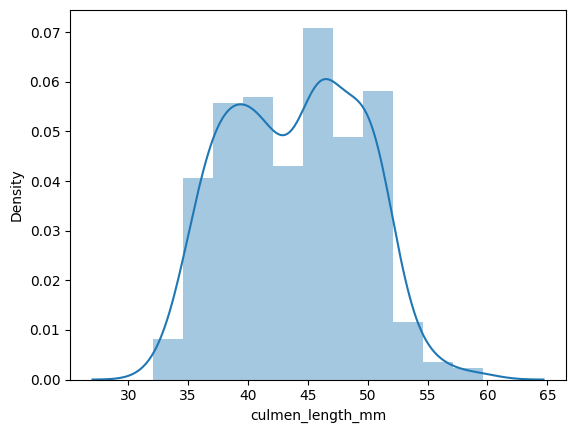

In [18]:
sns.distplot(df.culmen_length_mm)

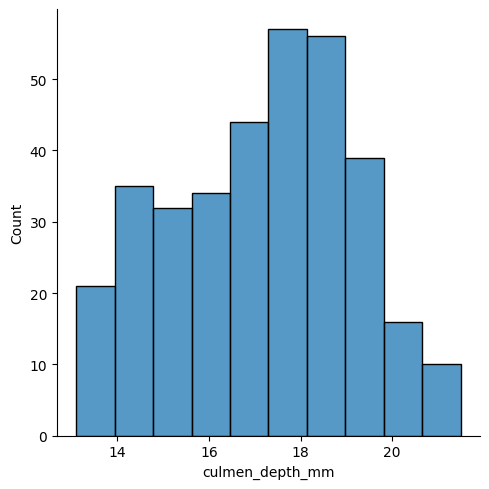

In [19]:
sns.displot(df.culmen_depth_mm)

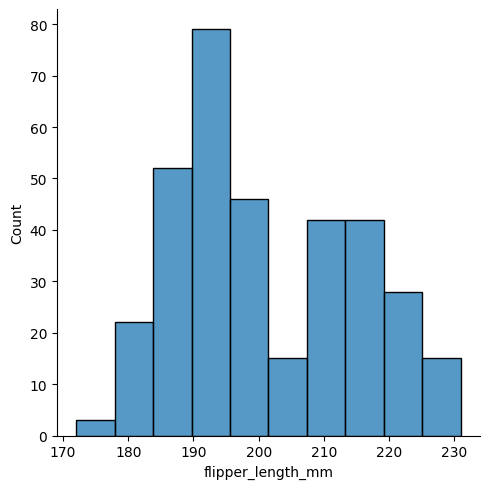

In [20]:
sns.displot(df.flipper_length_mm)

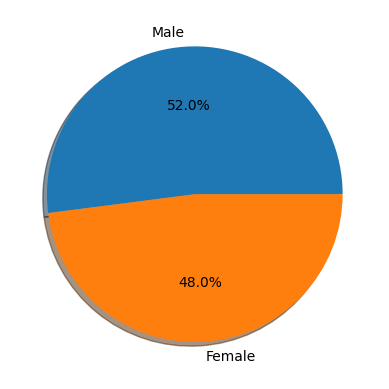

In [21]:
plt.pie(df.sex.value_counts(),[0.,0.],labels=['Male','Female'],autopct="%1.1f%%",shadow=True)
plt.show()


## Correlation of independent variables with the target

In [22]:
correlation_matrix=df.corr()

<ipython-input-22-76b5ce6ad480>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


In [23]:
correlation_with_target=correlation_matrix['culmen_length_mm'].sort_values(ascending=False)
print(correlation_with_target)

culmen_length_mm     1.000000
flipper_length_mm    0.655858
body_mass_g          0.594925
culmen_depth_mm     -0.235000
Name: culmen_length_mm, dtype: float64


##Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

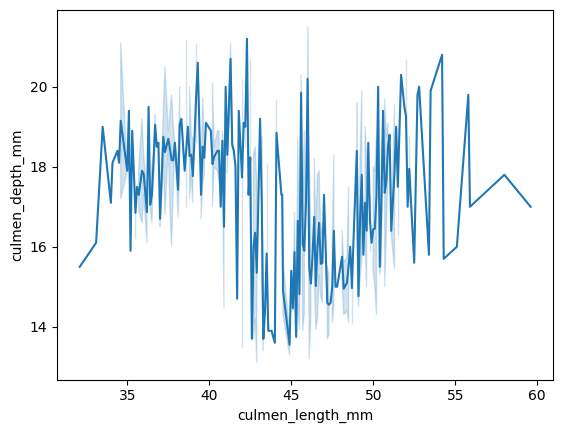

In [24]:
sns.lineplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

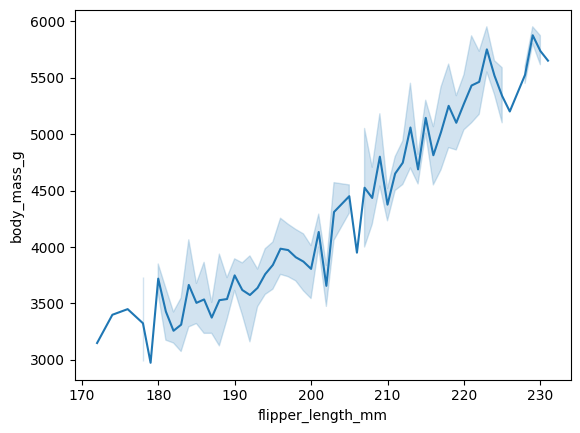

In [25]:
sns.lineplot(x=df.flipper_length_mm,y=df.body_mass_g)

##Multivariate Analysis

<ipython-input-26-dbf7c0edd73f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="tab20")


<Axes: >

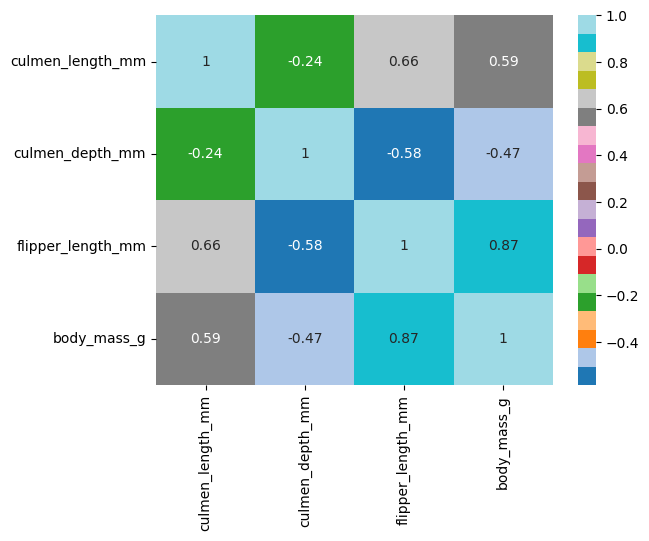

In [26]:
sns.heatmap(df.corr(),annot=True,cmap="tab20")

##Outlier Detection

<Axes: >

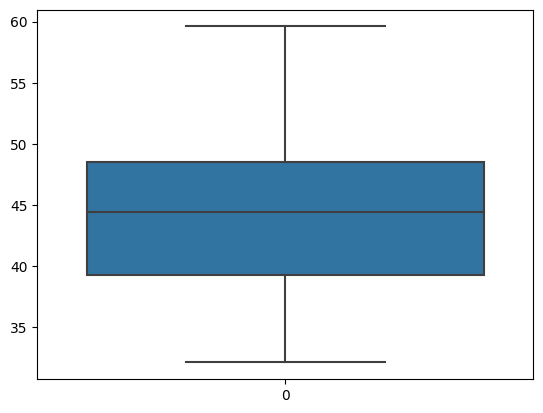

In [27]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

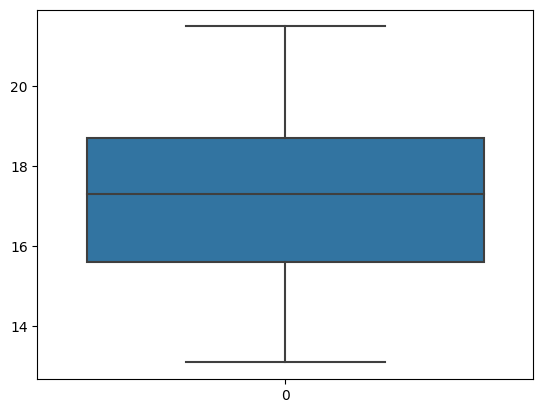

In [28]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

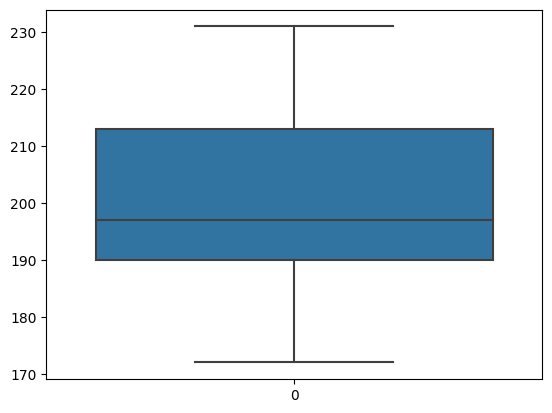

In [29]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

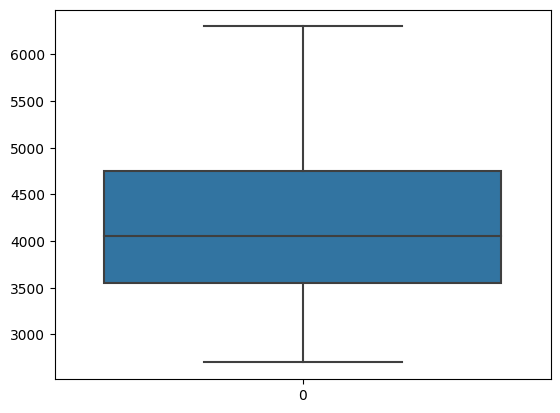

In [30]:
sns.boxplot(df.body_mass_g)

##Independent(x) and dependent(y) variable split

In [31]:
x=df.iloc[:,1:]
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


##Performing Label Encoding for categorical columns

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
x['island'] = le.fit_transform(df['island'])
x['sex'] = le.fit_transform(df['sex'])

In [34]:
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [35]:
y = df.species

In [36]:
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

##Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [38]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


##Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

##Train and Test data shape

In [40]:
x_train.shape

(240, 6)

In [41]:
x_test.shape

(104, 6)